In [78]:
import pandas as pd
df =pd.read_csv(r"C:\Users\nteny\Desktop\DATASETS\student_habits_performance.csv")

df


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [79]:
# Generate dummy variables
df = pd.get_dummies(
    df,
    columns=["gender", "part_time_job", "diet_quality", 
             "parental_education_level", "internet_quality", 
             "extracurricular_participation"],
    drop_first=True
)

# Convert all dummy columns (newly created) to integers
dummy_columns = df.columns[df.columns.str.contains('|'.join([
    'gender_', 'part_time_job_', 'diet_quality_',
    'parental_education_level_', 'internet_quality_',
    'extracurricular_participation_'
]))]

df[dummy_columns] = df[dummy_columns].astype(int)


In [80]:
# Temporarily set the display option
df.drop(columns=["student_id"], inplace=True)
df

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,0,0,0,0,0,0,1,0,0,1
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,0,0,0,1,0,1,0,0,0,0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,1,0,0,0,1,1,0,0,1,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,0,0,0,1,0,1,1,0,1
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,0,0,0,0,0,1,0,1,0,1
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0,0,1,0,1,1,0,0,0,1
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,1,0,0,1,0,0,0,1,0,1
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,1,0,1,0,0,0,0,0,0,0


In [81]:
from sklearn.model_selection import train_test_split

y=df["exam_score"]
x=df.drop(columns="exam_score")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [83]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = model.predict(x_test)
mse =mean_squared_error(y_test,y_pred)
re=r2_score(y_test,y_pred)

print(f"mse:{mse: 2f},re:{re: 2f}")

mse: 26.464502,re: 0.896796


                                 Feature  Coefficient
1                    study_hours_per_day     9.529012
5                            sleep_hours     1.980160
7                   mental_health_rating     1.955663
6                     exercise_frequency     1.318297
9                           gender_Other     0.746440
10                     part_time_job_Yes     0.369667
4                  attendance_percentage     0.142756
8                            gender_Male     0.134899
0                                    age     0.050058
16                 internet_quality_Poor    -0.010850
17     extracurricular_participation_Yes    -0.112191
15                 internet_quality_Good    -0.198685
13  parental_education_level_High School    -0.272107
14       parental_education_level_Master    -0.521722
12                     diet_quality_Poor    -0.567759
11                     diet_quality_Good    -0.971059
3                          netflix_hours    -2.315607
2                     social

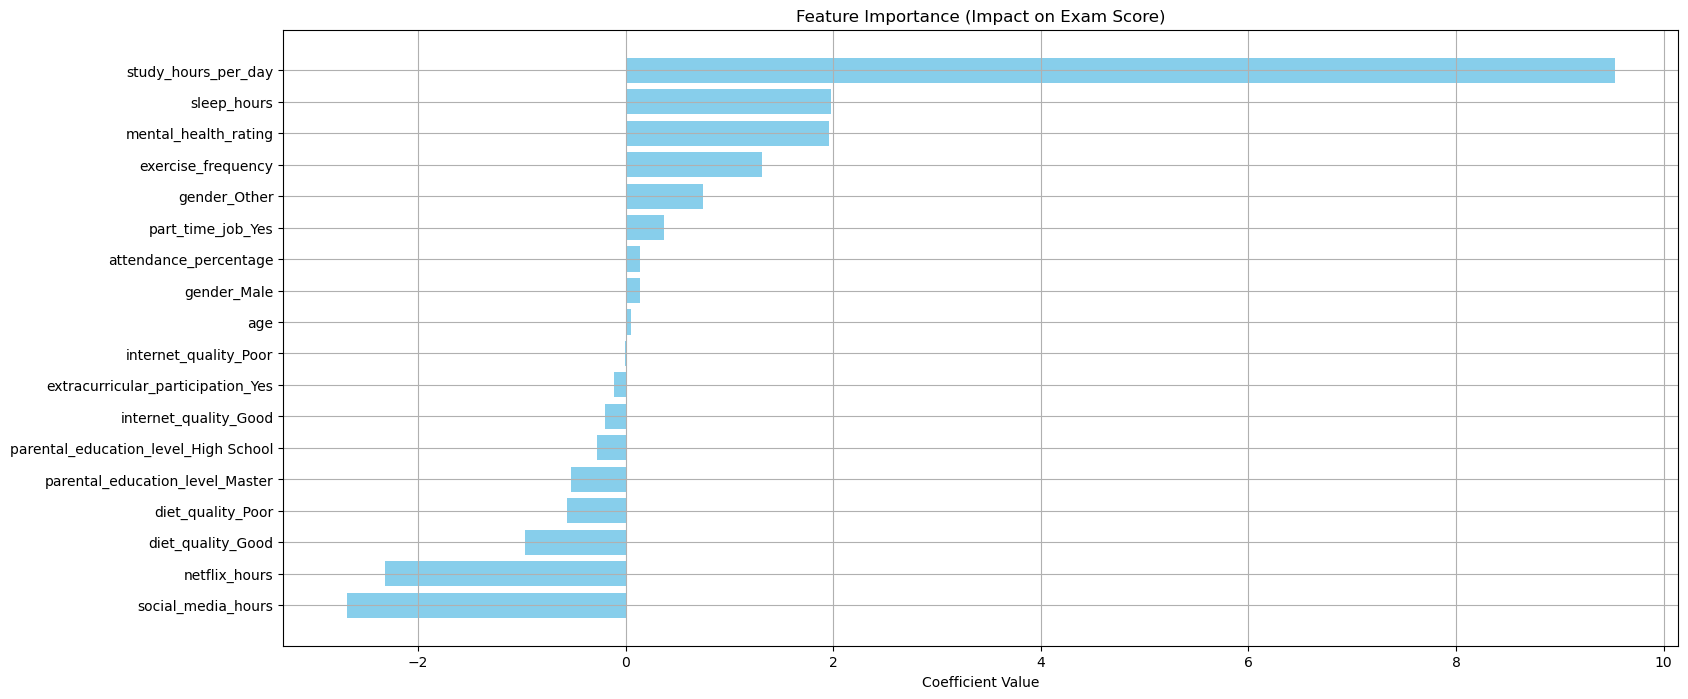

In [89]:
# Get feature importance
feature_importance = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

# Show the table
print(feature_importance)

# Optional: Plot the top features
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.barh(feature_importance["Feature"], feature_importance["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Impact on Exam Score)")
plt.gca().invert_yaxis()  # Highest impact on top
plt.grid(True)
plt.show()

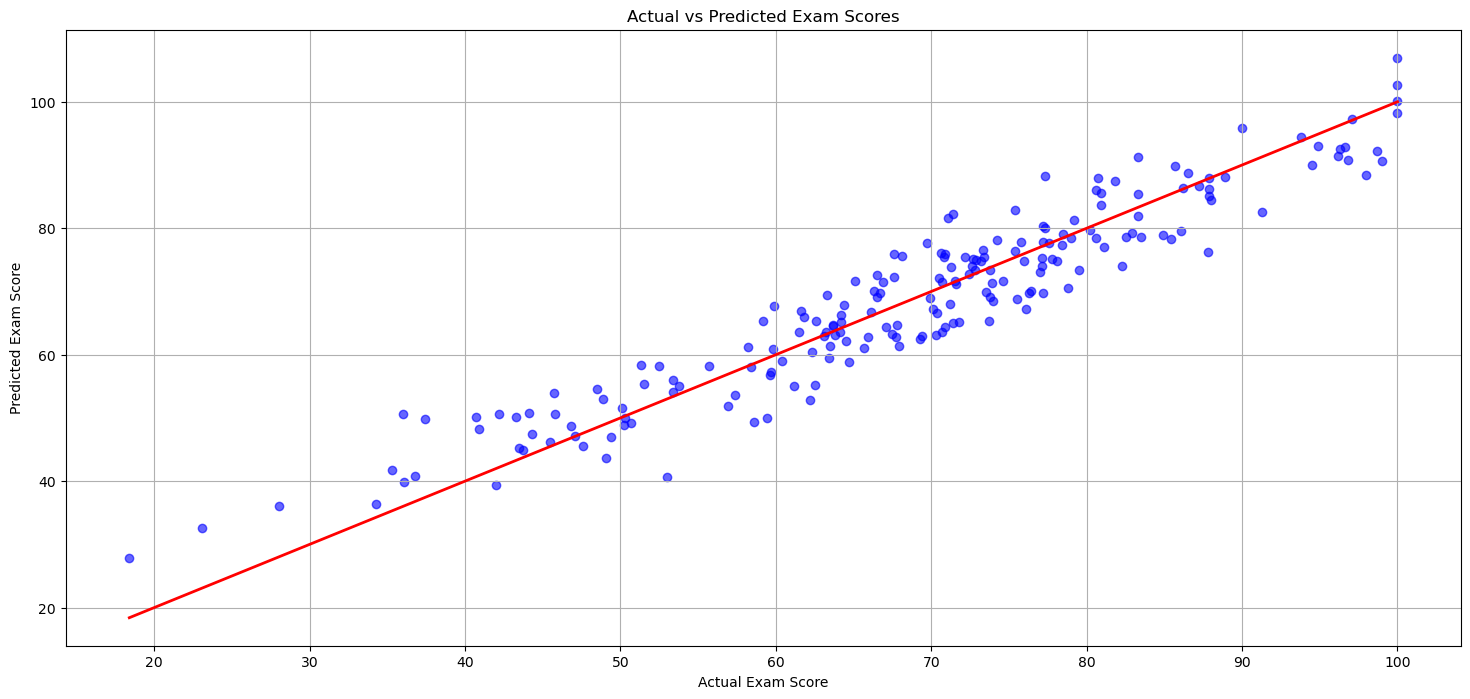

In [87]:
plt.figure(figsize=(18,8))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)  # Ideal line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.grid(True)
plt.show()